read in data

In [1]:
import numpy as np
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt
import pandas as pd
from pre_and_post_valuations_data import transaction_data_file, block_data_file, pre_geth_file, \
    geth_reccomendation_file, suite_spot_txn, suite_spot_blx



#Read in the data, use your own machines specific path as you see fit
transaction_data=pd.read_csv(transaction_data_file)
block_data=pd.read_csv(block_data_file)
pre_geth=pd.read_csv(pre_geth_file)
geth_r=pd.read_csv(geth_reccomendation_file)
suite_txn=pd.read_csv(suite_spot_txn)
suite_blx=pd.read_csv(suite_spot_blx)

use previously written code to clean and combine the datasets

In [2]:

#######################################################################################################################
## ADDING THE GAS LIMITS AND BASE FEE INTO THE DATAFRAME
#######################################################################################################################
## first we put the gas limits as well as the base fee into the  transaction dataframe
#######################################################################################################################


#######################################################################################################################
## ADDING THE GAS LIMITS AND BASE FEE INTO THE DATAFRAME
#######################################################################################################################
## first we put the gas limits as well as the base fee into the  transaction dataframe
#######################################################################################################################





#Get the block number and gas limits and base fee from the dataset
my_block_number=list(block_data.block_number)
my_gas_limit=list(block_data.gas_limit)
my_base_fee=list(block_data.base_fee_per_gas)
#initialize a dictionary to assign gas limits and base fee to the transaction data
gas_limit_tracker={}
base_fee_tracker={}


#makes a dicionary with the key being the block number and the 
#value being the gas limits and base fee, because this will allow us to 
#easily assign a gas limit and base fee to the transaction going forward
for i in range(len(my_block_number)):
    gas_limit_tracker[my_block_number[i]]=my_gas_limit[i]
    base_fee_tracker[my_block_number[i]]=my_base_fee[i]
    
    
##get the block numbers from the transaction data
transaction_block_numbers=list(transaction_data.block_number)


#initialize a list for the purpose of saving the gas limits that will 
#be assigned to the transaction data and assign the correct information
gas_limits_for_transaction_data=[gas_limit_tracker[x] for x in transaction_block_numbers]
base_fee_for_transaction_data=[base_fee_tracker[x] for x in transaction_block_numbers]

    
#add the column into the dataframe
#transaction_data['gas_limit']=gas_limits_for_transaction_data
transaction_data['base_fee']=base_fee_for_transaction_data


# The final step is to remove the NA's from then dataframe, from testing of the 
# dataset, i have found that the max priority fee per gas and the max fee per gas
# have the the same number of NA's -this can be oberved with the line 
# np.sum(transaction_data.isna())- that we can remove the NA's with the line...
transaction_data=transaction_data[pd.notnull(transaction_data.max_fee_per_gas)]


#######################################################################################################################
## RESCALING THE GAS PRICES
#######################################################################################################################
## now we need to add another column to revert the gas price into a metric that we 
## can compare to the pre EIP 1559 data. to do this, we will need to work under the
## assumption that gas limits represent the same metric that they do in the pre EIP 
## 1559 network (which is an assumption that the previous paper made that we will 
## continue in this proposal). then, we see that the user bid has a specific value 
## in the post EIP 1559 section which is min(base fee + tip , max tip), while in the pre EIP section the userbid is equal 
## to gas price * gas limit. Therefore, if we set these metrics to be equal, we can 
## solve for the equivilent of the gas prices in the post EIP section by taking the 
## min(base fee + tip , max tip) and dividing it by the gas limit
#######################################################################################################################


#get all the values...
b_fee=list(transaction_data.base_fee)
g_limit=list(transaction_data.gas)
m_fee=list(transaction_data.max_fee_per_gas)
tip=list(transaction_data.max_priority_fee_per_gas)


#Get the user bid for the specified transaction
#user_bid=[min(b_fee[x]+tip[x],m_fee[x]) for \
#                    x in range(len(b_fee))]


#Evaluate and store the rescaled gas prices
#rescaled_gas_prices=[min(b_fee[x]+tip[x],m_fee[x])/g_limit[x] for \
#                    x in range(len(b_fee))]


#add the gas prices and user bid back into the dataframe
#transaction_data['rescaled_gas_prices']=rescaled_gas_prices
#transaction_data['user_bid']=user_bid

In [3]:
display(transaction_data)

,hash,block_number,value,gas,gas_price,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_used,base_fee
77,0xb694a24da8824d6971cc9566a94a12eb4840744a41ff...,12965401,0.000000e+00,2000000,164476296532,2.477601e+11,6.950232e+10,2,655016,94973980561
113,0xd446779806b1d7872274d5a96d4467e19061f91afd08...,12965401,0.000000e+00,575000,137641981761,1.376420e+11,1.376420e+11,2,256690,94973980561
131,0xcacc3b9c1183d295035426cad5f2b3c3592d6f5bc8bc...,12965401,0.000000e+00,600000,117000000000,1.170000e+11,1.170000e+11,2,228615,94973980561
139,0xb5e82901711d56cc1ed71b53bedab13f736a147f1aec...,12965401,9.000000e+16,181878,114492439218,2.227327e+11,1.951846e+10,2,180284,94973980561
161,0xa8cb186ede094e2bc472aceb64ff8a9a53da4becc67f...,12965401,0.000000e+00,21000,107102601947,2.210714e+11,1.212862e+10,2,21000,94973980561
...,...,...,...,...,...,...,...,...,...,...
883769,0xec1a176e7a2cc37389bf2ff27a169a240f1734c33a08...,12969997,2.804744e+16,3000000,29635881520,2.963588e+10,0.000000e+00,2,121233,29635881520
883770,0x31eca90accfcb17e2d85dfc6418d420988067bf856e6...,12969997,0.000000e+00,1000000,34505402509,3.450540e+10,3.450540e+10,2,210545,29635881520
883837,0xfa623209d41ba4409537b5739d4fa0abbefd687313c2...,12969997,4.109970e+15,42000,31502952651,3.150295e+10,1.867071e+09,2,21000,29635881520
883853,0xeb54da76c9059da24af786d1dc97f76da7faebbc9e97...,12969998,0.000000e+00,1000000,165487905007,1.654879e+11,1.654879e+11,2,122846,28080959215


In [4]:
#grab the block numbers from the dataset
my_blocks=list(set(list(transaction_data.block_number)))


#grab the usable block numbers, as we cant derive reccomendations from the 
#first 100 blocks because the reccomendation is based on the previous 100 
#blocks
usable_blocks=my_blocks[101:]
#get the first block
usable_blocks[0]




#initialize a list to contain the minimum
min_list=[]

#this loop goes through each of the 
#usable blocks, finds the lowest rescaled gas price, 
#then gets the bid associated with that
#gas price, and then adds it to the min_list
for i in my_blocks:        
    current_itteration=transaction_data[transaction_data.block_number == i]
    tip_values=list(current_itteration.max_priority_fee_per_gas)
    min_value=np.min(tip_values)
    min_list.append(min_value)
    
        
        
        
#initialize a list to contain the geth reccomendations
geth_reccomendation=[]


for i in range(len(usable_blocks)):
    geth_reccomendation.append(np.percentile(min_list[i:i+100],60))

    
#use only the usable blocks for our final dataframe  
final_dataframe=transaction_data[transaction_data.block_number >= usable_blocks[0]]


#initialize a dictionary to contain the geth reccomendations
geth_r_tracker={}

#assign the values based on the block number
for i in range(len(usable_blocks)):
    geth_r_tracker[usable_blocks[i]]=geth_reccomendation[i]
    
    
#get the blocks from the dataframe
my_final_blocks=list(final_dataframe.block_number)

#initialize a list that will contain the geth reccomendation
geth_r_for_dataframe=[]

#assign the ressomendation
for i in my_final_blocks:
    geth_r_for_dataframe.append(geth_r_tracker[i])
    
#put the reccomendation back into the dataframe
final_dataframe['geth_recommendation_tip']=geth_r_for_dataframe


#calculate the valuations according to the methodology of the 
#last paper
final_dataframe['valuations_tip']=final_dataframe['max_priority_fee_per_gas']  \
/ final_dataframe['geth_recommendation_tip']

final_dataframe['geth_recommendation_max_fee']=final_dataframe['geth_recommendation_tip'] + \
2 * final_dataframe['base_fee']

final_dataframe['valuations_max_fee']=final_dataframe['max_fee_per_gas'] \
/ final_dataframe['geth_recommendation_max_fee']


#display the results to the user
display(final_dataframe)

/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_2013/4228385002.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe['geth_recommendation_tip']=geth_r_for_dataframe
/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_2013/4228385002.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe['valuations_tip']=final_dataframe['max_priority_fee_per_gas']  \
/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_2013/4228385002.py:70: SettingWithCopyWarning: 
A va

,hash,block_number,value,gas,gas_price,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_used,base_fee,geth_recommendation_tip,valuations_tip,geth_recommendation_max_fee,valuations_max_fee
516516,0x4ecc6a513ce1c02e1367c7bca169233d7da61a721d54...,12968054,0.000000e+00,120000,40658350000,4.065835e+10,4.065835e+10,2,43713,34209998215,4.011818e+09,10.134645,7.243181e+10,0.561333
516524,0x9128b87ba28e3bdbb40491ea5d3ec4fffd9bdf24638e...,12968054,0.000000e+00,250000,39209998215,7.200000e+10,5.000000e+09,2,57206,34209998215,4.011818e+09,1.246318,7.243181e+10,0.994038
516787,0x49d63c1b486c0f99c05a5ab4970919684fb23b056c12...,12968055,5.000000e+16,211131,40107493816,4.010749e+10,4.010749e+10,2,201299,32526865584,4.011818e+09,9.997337,6.906555e+10,0.580716
516859,0x865c8eedc70ff15750ced3ed0d714bf8eb440ddd9e33...,12968055,7.075910e+15,21000,36526865584,7.800000e+10,4.000000e+09,2,21000,32526865584,4.011818e+09,0.997054,6.906555e+10,1.129362
516903,0x27d26ab8a6a69e82e4b50e899622e7d193bdb097119c...,12968055,0.000000e+00,362127,35050243944,3.505024e+10,3.505024e+10,2,212973,32526865584,4.011818e+09,8.736749,6.906555e+10,0.507492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883769,0xec1a176e7a2cc37389bf2ff27a169a240f1734c33a08...,12969997,2.804744e+16,3000000,29635881520,2.963588e+10,0.000000e+00,2,121233,29635881520,4.000000e+09,0.000000,6.327176e+10,0.468390
883770,0x31eca90accfcb17e2d85dfc6418d420988067bf856e6...,12969997,0.000000e+00,1000000,34505402509,3.450540e+10,3.450540e+10,2,210545,29635881520,4.000000e+09,8.626351,6.327176e+10,0.545352
883837,0xfa623209d41ba4409537b5739d4fa0abbefd687313c2...,12969997,4.109970e+15,42000,31502952651,3.150295e+10,1.867071e+09,2,21000,29635881520,4.000000e+09,0.466768,6.327176e+10,0.497899
883853,0xeb54da76c9059da24af786d1dc97f76da7faebbc9e97...,12969998,0.000000e+00,1000000,165487905007,1.654879e+11,1.654879e+11,2,122846,28080959215,4.000000e+09,41.371976,6.016192e+10,2.750709


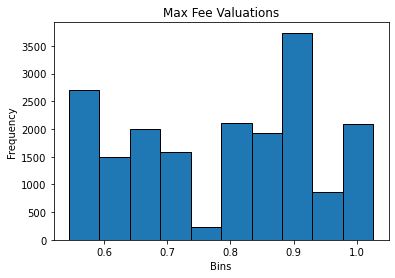

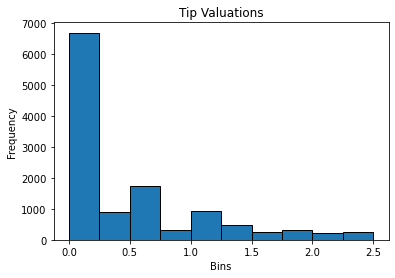

In [11]:

my_tips_val=list(final_dataframe.valuations_tip)
tip_hi=np.percentile(my_tips_val,90)
tip_lo=np.percentile(my_tips_val,10)
my_tips_val=[x for x in my_tips_val if (x < tip_hi) & (x > tip_lo)]


my_max_fee_val=list(final_dataframe.valuations_max_fee)
max_hi=np.percentile(my_max_fee_val,90)
max_lo=np.percentile(my_max_fee_val,10)
my_max_fee_val=[x for x in my_max_fee_val if (x < max_hi) & (x > max_lo)]




#create the plotting objects
fig = plt.figure()
ax = plt.axes()


plt.hist(my_max_fee_val,ec='black')
ax.set_title('Max Fee Valuations')
ax.set_ylabel('Frequency')
ax.set_xlabel('Bins')
plt.savefig('max_fee_valuations.png')




#create the plotting objects
fig2 = plt.figure()
ax2 = plt.axes()

plt.hist(my_tips_val,ec='black')
ax2.set_title('Tip Valuations')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Bins');
plt.savefig('tip_valuations.png')















